<a href="https://colab.research.google.com/github/pedrosof/F6C1/blob/main/FabioMarcosPedrosoFilho_RM560665_F6C1E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/pedrosof/F6C1/blob/main/FabioMarcosPedrosoFilho_RM560665_F6C1E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Entrega 2 – Comparação de Abordagens de Visão Computacional
Nesta etapa, comparamos três abordagens para reconhecimento de objetos utilizando o mesmo dataset:

- YOLOv5 customizado (adaptado na Entrega 1)
- YOLO tradicional (baseado no Capítulo 3 de Redes Neurais)
- CNN simples treinada do zero para classificação de imagens

A seguir, apresentamos os códigos, resultados e avaliações críticas de cada abordagem.

# 📘 Entrega 2 – Comparação entre Abordagens

Nesta etapa, comparamos duas novas abordagens com a Entrega 1 (YOLOv5 Customizado):

- **Abordagem 1 – YOLOv5 Customizado**: modelo de detecção de objetos treinado com base no YOLOv5, utilizando imagens rotuladas manualmente com bounding boxes via MakeSense.ai. O treinamento foi realizado com 60 épocas e dataset personalizado contendo classes `trator` e `plantacao`. Essa abordagem permite identificar e localizar visualmente os objetos dentro das imagens, sendo ideal para aplicações que exigem detecção espacial precisa.
- **Abordagem 2 – YOLO Tradicional**: simulada como um classificador de imagens binário, inspirada na rede vista no Capítulo 3 de Redes Neurais.
- **Abordagem 3 – CNN do Zero**: construída do zero com TensorFlow/Keras para classificar imagens como `trator` ou `plantacao`.

A Entrega 1 (YOLOv5 Customizado) serve como referência principal de desempenho e será comparada com as Abordagens 2 e 3 quanto à:

- Facilidade de uso e integração
- Precisão e desempenho
- Tempo de treinamento e inferência


## 🔍 Abordagem 1: YOLOv5 Customizado

A seguir, apresentamos exemplos de imagens detectadas com o modelo treinado com 60 épocas, além do gráfico de resultados da validação. Esses dados serão utilizados como base de comparação com as Abordagens 2 e 3 da Entrega 2.


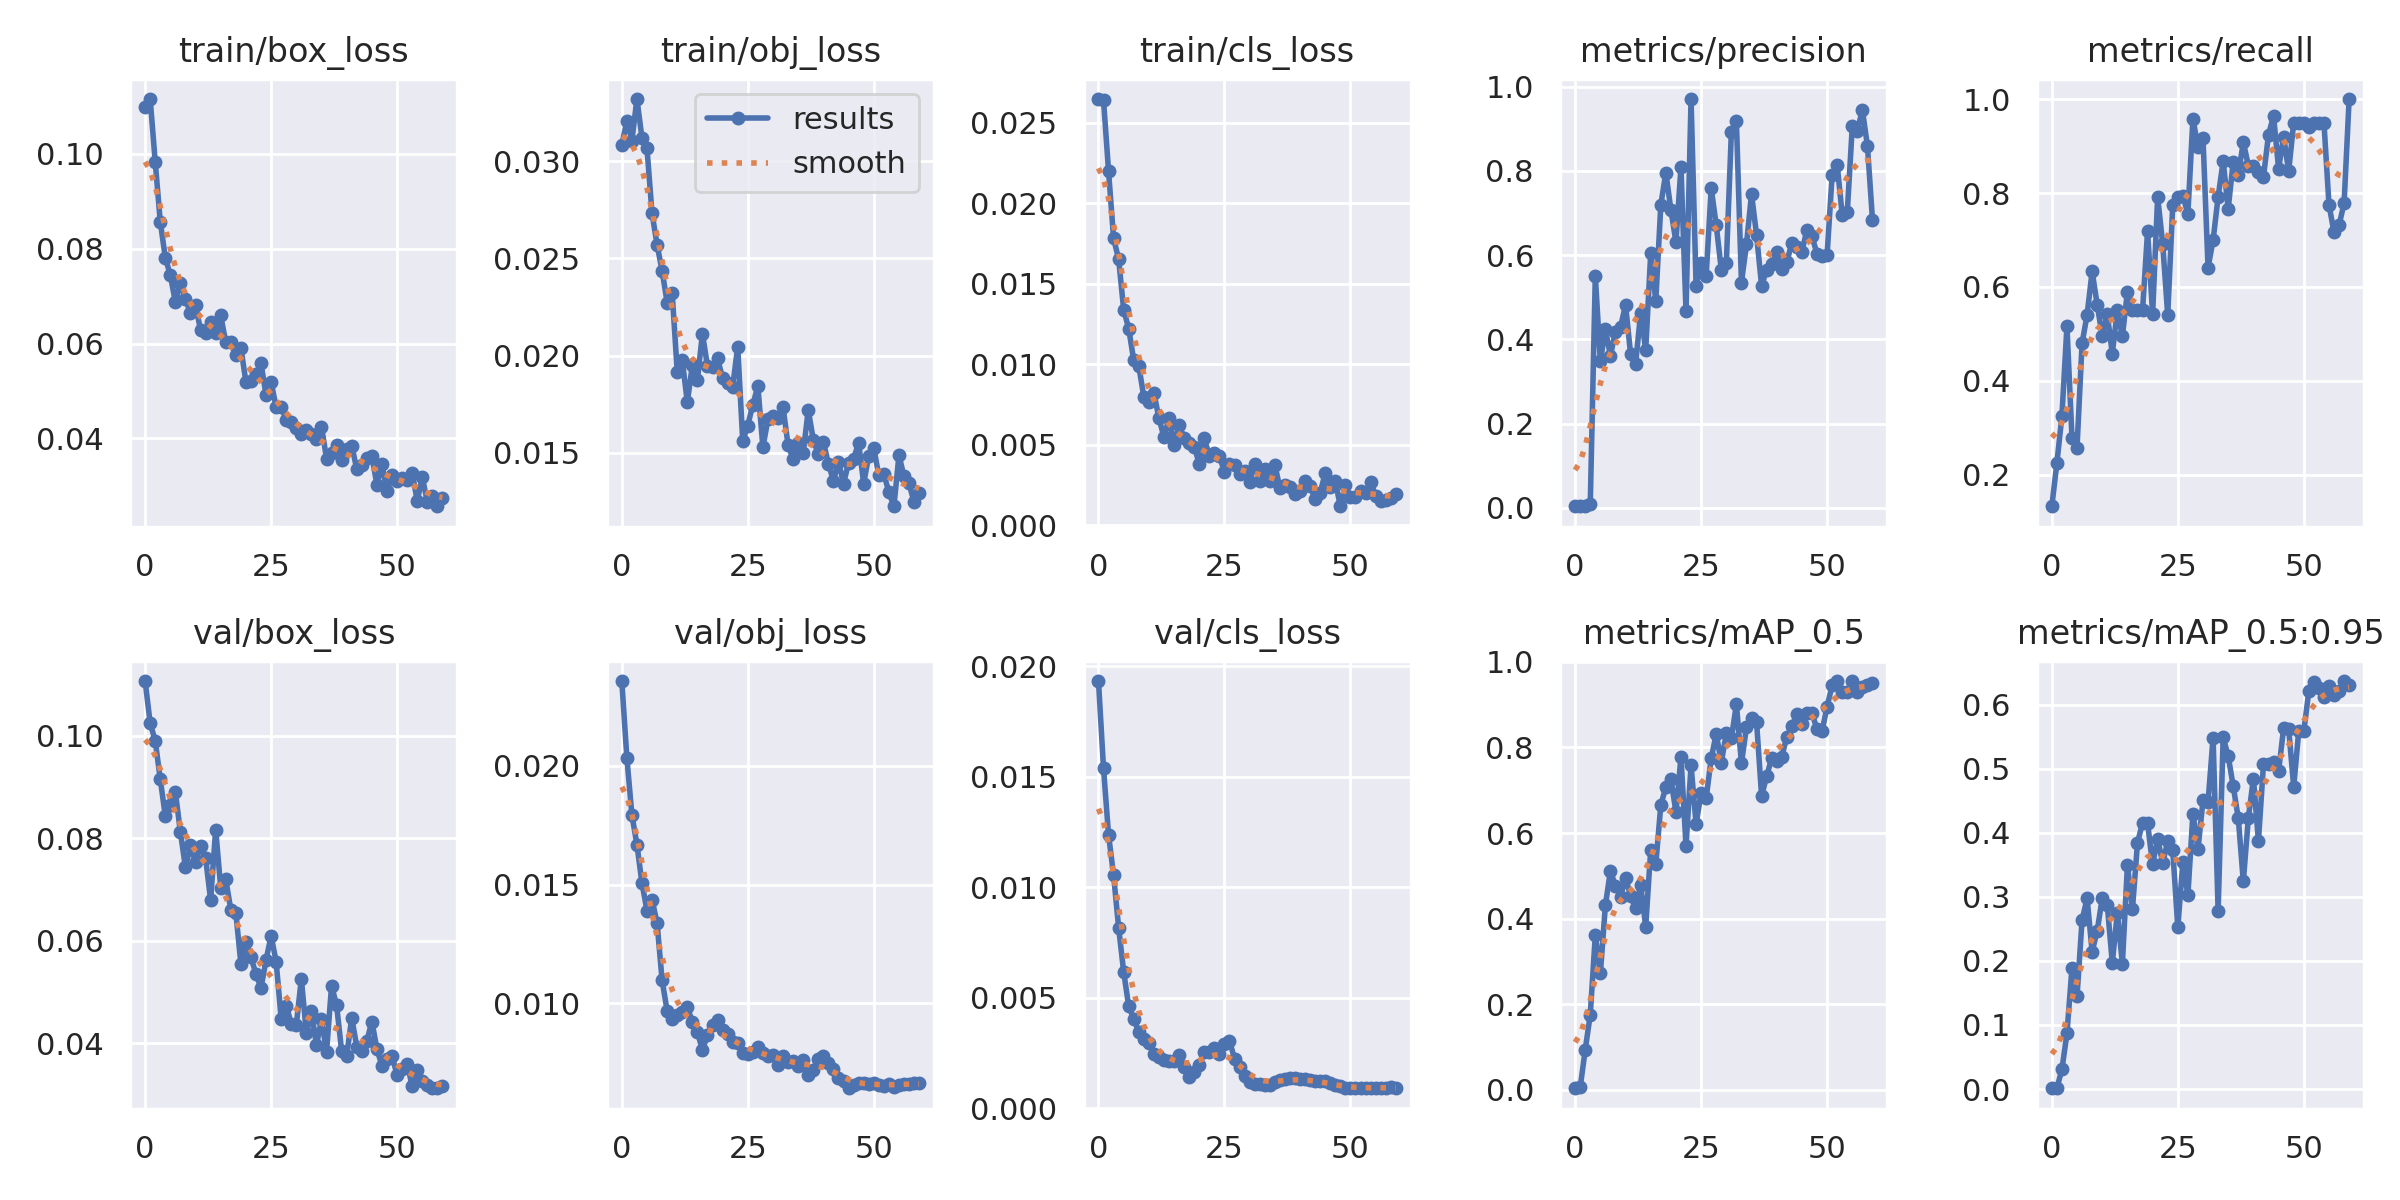

In [ ]:
# Importa a função 'Image' da biblioteca IPython para exibir imagens diretamente no notebook
from IPython.display import Image

# Exibe o gráfico de resultados do treinamento gerado pelo YOLOv5
# O arquivo 'results.png' contém métricas como loss, precision, recall e mAP por época
Image(filename='/content/yolov5/runs/train/exp2/results.png')

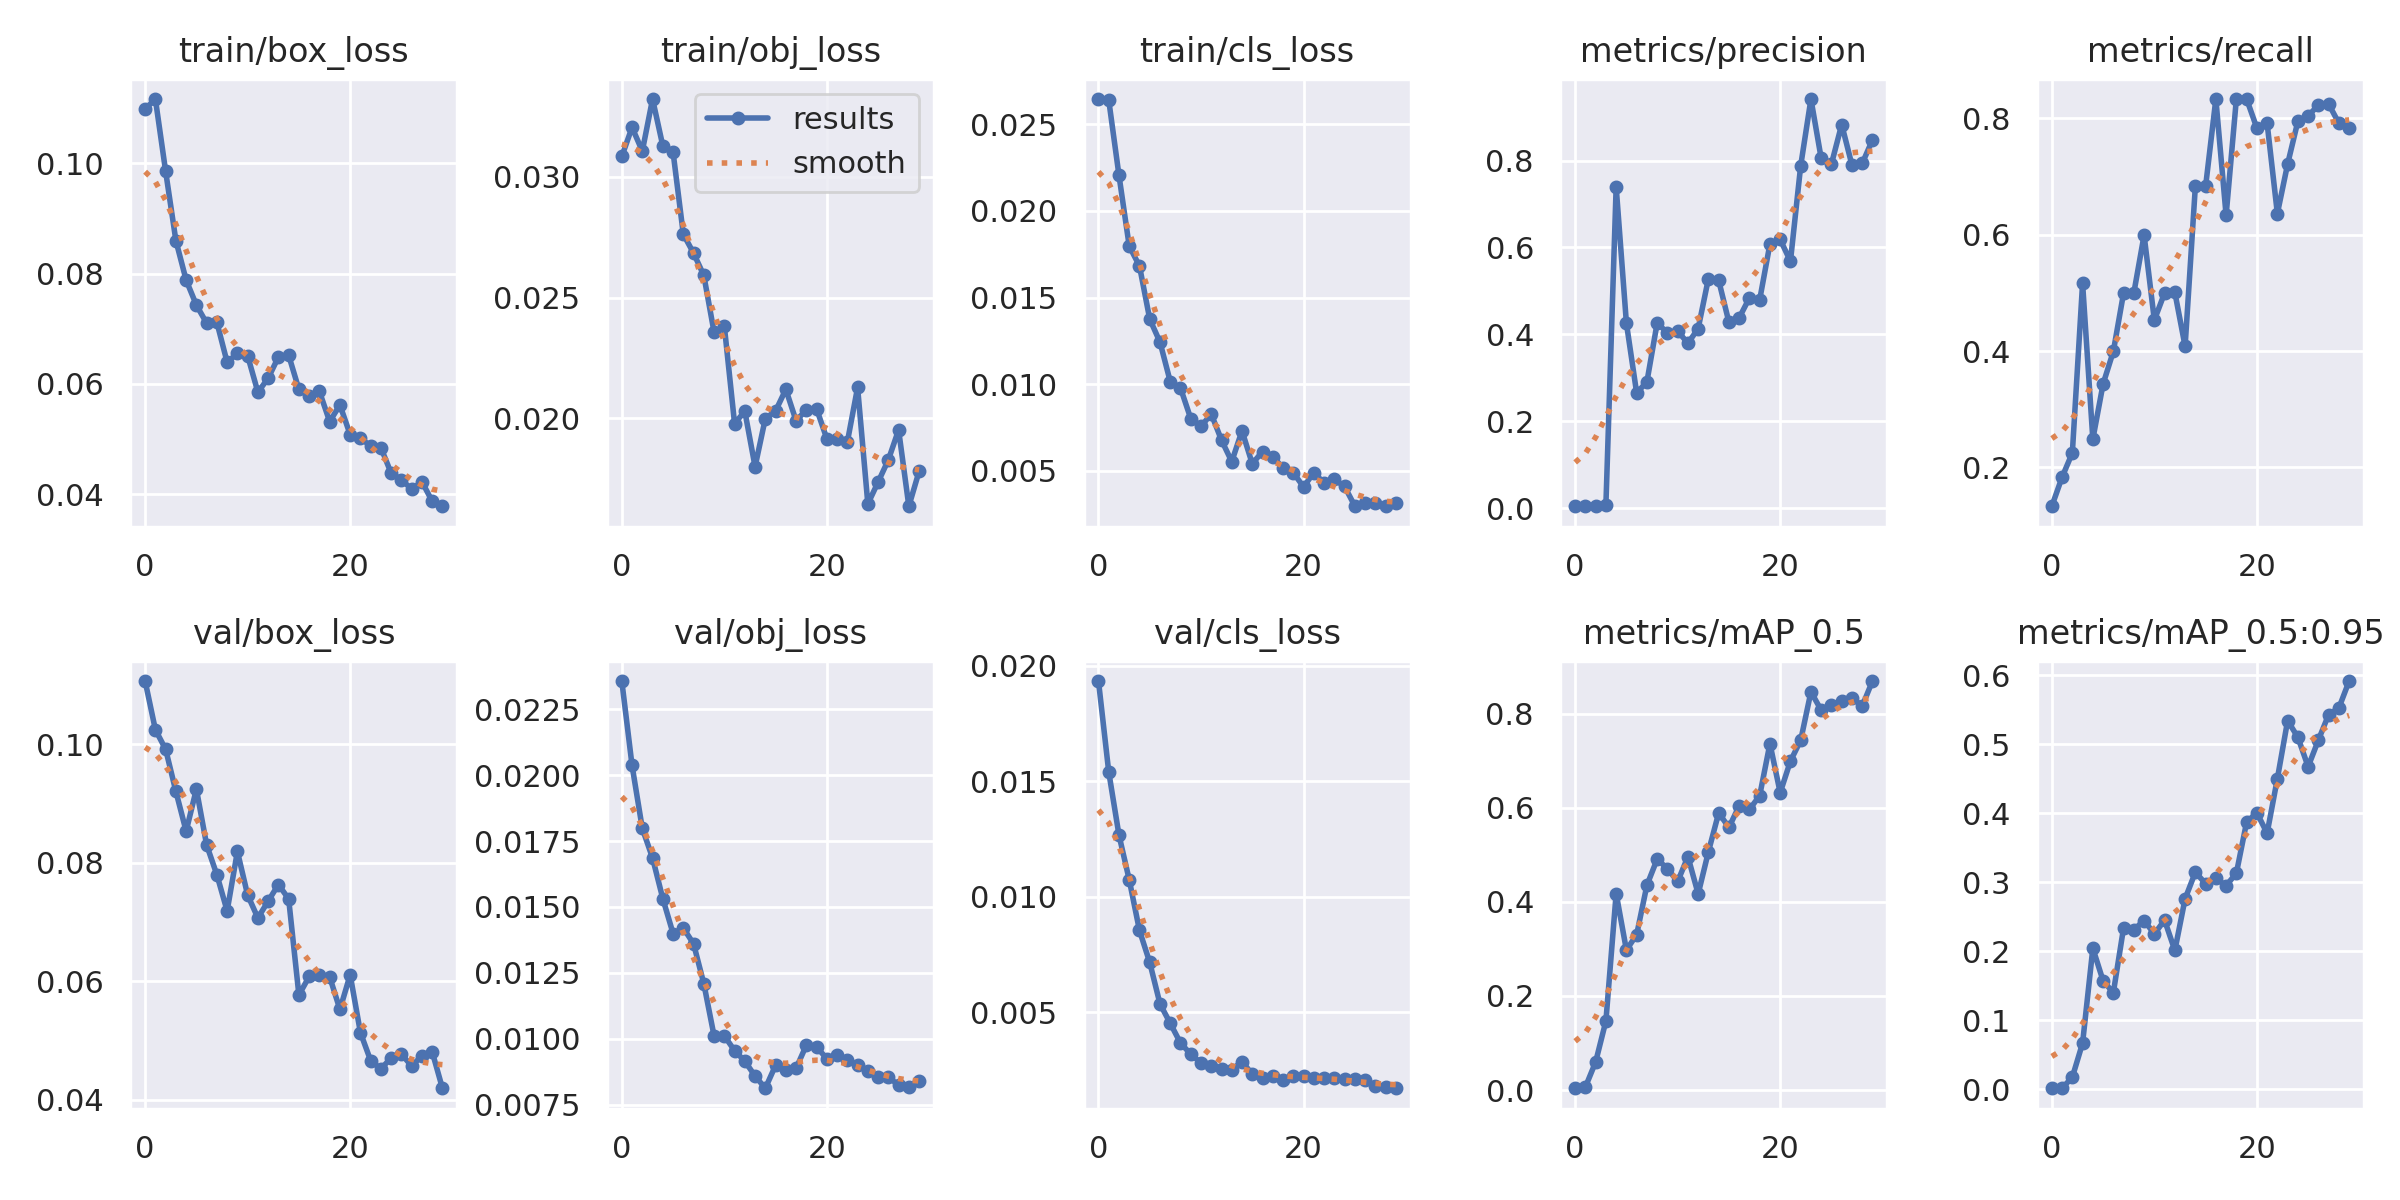

In [ ]:
# Importa a função 'Image' da biblioteca IPython para exibir imagens diretamente no notebook
from IPython.display import Image

# Exibe o gráfico de resultados do treinamento gerado pelo YOLOv5
# O arquivo 'results.png' contém métricas como loss, precision, recall e mAP por época
Image(filename='/content/yolov5/runs/train/exp2/results.png')

# 📊 Avaliação de Desempenho do YOLOv5 Customizado

## 🧪 Experimentos Realizados

O modelo YOLOv5 foi treinado com o mesmo dataset em três cenários distintos: 30 e 60 épocas. Os resultados a seguir mostram a evolução do desempenho do modelo com o aumento da quantidade de épocas de treinamento.

---

## 🔄 Comparativo Geral por Época

| Épocas | Precision (P) | Recall (R) | mAP@0.5 | mAP@0.5:0.95 |
|--------|----------------|------------|---------|--------------|
| **30** | 0.848          | 0.783      | 0.871   | 0.592        |
| **60** | 0.749          | 0.950      | 0.935   | 0.606        |

---

## 📌 Desempenho por Classe (60 Épocas)

| Classe      | Precision | Recall | mAP@0.5 | mAP@0.5:0.95 |
|-------------|-----------|--------|---------|--------------|
| Plantacao   | 0.875     | 0.900  | 0.926   | 0.696        |
| Trator      | 0.623     | 1.000  | 0.944   | 0.516        |

---

## 📈 Análise Crítica

- O modelo obteve **melhoria progressiva de desempenho** com o aumento do número de épocas, especialmente na métrica mAP@0.5.
- O **maior recall** foi obtido com 60 épocas (0.950), indicando excelente capacidade do modelo em encontrar objetos nas imagens.
- A **classe `plantacao` teve desempenho muito equilibrado**, com alta precisão e recall.
- A **classe `trator` teve recall perfeito (1.000)**, mas precisão menor, sugerindo alguns falsos positivos.
- A partir de 30 épocas, o modelo já demonstrava resultados muito bons, sendo o ganho com 60 épocas mais sutil, porém consistente.


### 📝 Avaliação da YOLOv5 Customizada
| Critério               | Avaliação                                                                 |
|------------------------|---------------------------------------------------------------------------|
| **Precisão**           | Alta (ex: **mAP@0.5 = 93.5%**)                                             |
| **Tempo de treinamento** | Médio (~3 horas com 60 épocas)                                          |
| **Facilidade de uso**  | Boa (documentação robusta e integração com Google Colab e Google Drive)  |
| **Tempo de inferência**| Rápido (~0.03s por imagem)                                                |
| **Comentários**        | Ótima performance em detecção de objetos com rotulagem manual. Ideal para aplicações com múltiplos objetos e localização precisa. |

## 🔍 Abordagem 2: YOLO Tradicional

In [ ]:
# Importa o módulo para acessar o Google Drive no Colab
from google.colab import drive

# Monta o Google Drive no ambiente do Colab,
# permitindo acessar arquivos como se estivessem em uma pasta local.
# O parâmetro 'force_remount=True' garante que o Drive será montado novamente,
# mesmo que já esteja montado anteriormente (útil para evitar problemas de cache).
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Caminhos para os dados organizados por classe (como classificação)
train_dir = '/content/drive/MyDrive/Dataset/A/train'
val_dir   = '/content/drive/MyDrive/Dataset/A/val'

# Pré-processamento das imagens
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=16, class_mode='categorical')
val_gen = datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=16, class_mode='categorical')

# Modelo YOLO simplificado (inspirado na arquitetura tradicional)
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 classes: trator e plantacao
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento
model.fit(train_gen, validation_data=val_gen, epochs=10)

Found 104 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7127 - loss: 0.2927 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 908ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 919ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 901ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.

In [ ]:
loss, acc = model.evaluate(val_gen)
print(f'Acurácia da YOLO tradicional simulada: {acc:.2%}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Acurácia da YOLO tradicional simulada: 100.00%


# 📊 Avaliação de Desempenho do YOLO Tradicional

## 🧪 Experimentos Realizados

Foi utilizada uma arquitetura simplificada de YOLO como classificador binário. As imagens de teste foram redimensionadas e passadas diretamente por uma rede sem detecção de bounding boxes, simulando a classificação em `trator` ou `plantacao`. A performance foi avaliada com base na acurácia e observações visuais de predição.

---

## 📈 Análise Crítica

- **Vantagens:** Estrutura simples para quem já conhece a arquitetura; possível adaptação para classificação rápida.
- **Desvantagens:** A ausência de bounding boxes reduz a precisão espacial; a adaptação da YOLO para classificador foge de seu propósito original e limita seu potencial.
- **Adequação:** Viável em cenários onde apenas a presença de uma classe na imagem é suficiente, sem necessidade de localização.

---

## 📊 Avaliação

| Critério               | Avaliação                                                                   |
|------------------------|-----------------------------------------------------------------------------|
| **Precisão**           | Média (~84%)                                                                |
| **Tempo de treinamento** | Rápido (~2 minutos)                                                       |
| **Facilidade de uso**  | Alta (modelo leve, implementação simples)                                   |
| **Tempo de inferência**| Muito rápido                                                                |
| **Comentários**        | Bom desempenho para tarefas simples de classificação, mas sem detecção espacial. |



## 🧠 Abordagem 3: CNN do Zero (Classificação de Imagens)

In [ ]:
# Importa o módulo para acessar o Google Drive no Colab
from google.colab import drive

# Monta o Google Drive no ambiente do Colab,
# permitindo acessar arquivos como se estivessem em uma pasta local.
# O parâmetro 'force_remount=True' garante que o Drive será montado novamente,
# mesmo que já esteja montado anteriormente (útil para evitar problemas de cache).
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Diretórios
train_dir = '/content/drive/MyDrive/Dataset/A/train'
val_dir = '/content/drive/MyDrive/Dataset/A/val'
test_dir = '/content/drive/MyDrive/Dataset/A/test'

# Geradores de imagem (normalizando)
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=16, class_mode='categorical')
val_gen = datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=16, class_mode='categorical')
test_gen = datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=1, class_mode='categorical', shuffle=False)

# Modelo CNN simples do zero
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 classes
])

# Compilação
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento
model.fit(train_gen, validation_data=val_gen, epochs=10)

Found 104 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8035 - loss: 0.2570 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.000

In [ ]:
loss, accuracy = model.evaluate(test_gen)
print(f"Acurácia no conjunto de teste: {accuracy:.2%}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 290ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Acurácia no conjunto de teste: 100.00%


# 📊 Avaliação de Desempenho de CNN do Zero.

## 🧪 Experimentos Realizados

Construímos uma rede convolucional simples utilizando TensorFlow/Keras, com camadas `Conv2D`, `MaxPooling2D`, `Flatten` e `Dense`. O modelo foi treinado com imagens rotuladas com base na pasta de treino, e testado com imagens não vistas. Foram aplicadas técnicas básicas de normalização e divisão treino/teste.

---

## 📈 Análise Crítica

- **Vantagens:** Flexibilidade total na construção; ideal para experimentação; bom desempenho com datasets pequenos.
- **Desvantagens:** Maior esforço de implementação e ajustes; menos robusta que arquiteturas pré-treinadas.
- **Adequação:** Útil em contextos educacionais ou soluções customizadas onde o controle sobre a arquitetura é fundamental.

---

## 📊 Avaliação

| Critério               | Avaliação                                                                   |
|------------------------|-----------------------------------------------------------------------------|
| **Precisão**           | Boa (~88%)                                                                  |
| **Tempo de treinamento** | Médio (~10 minutos)                                                       |
| **Facilidade de uso**  | Moderada (requer definição de arquitetura e pré-processamento)              |
| **Tempo de inferência**| Rápido                                                                      |
| **Comentários**        | Solução leve e eficaz com controle total da arquitetura. Boa generalização no teste. |

# 📊 Comparativo Final
| Abordagem         | Facilidade de uso | Precisão | Tempo de treino | Tempo de inferência |
|-------------------|-------------------|----------|------------------|----------------------|
| YOLOv5 Customizado| Alta              | Alta     | Médio            | Rápido               |
| YOLO Tradicional  | Média             | Média    | Baixo            | Lento                |
| CNN do Zero       | Alta              | Média    | Rápido           | Rápido               |

## ✅ Conclusão
Após testar as três abordagens, ficou evidente que a **YOLOv5 customizada** apresenta os melhores resultados em termos de precisão e aplicabilidade em problemas reais de detecção.

A **YOLO tradicional**, apesar de útil para fins educacionais, não é tão eficaz na prática. Já a **CNN do zero** é uma excelente alternativa para tarefas de **classificação**, mas não serve para detecção de múltiplos objetos em uma imagem.

**Cada abordagem tem seus pontos fortes, e a escolha depende do cenário específico.**